## Proyecto Final de carrera 

### Consigna del Trabajo


#### Elige tu punto de partida entre dos opciones: 

Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

* **Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera**. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.
* **Agrega al proyecto información de otra fuente. ¡Es sumamente válido!** En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.
* **Continúa el Análisis Exploratorio de Datos**. Recuerda que es tan importante como entrenar un modelo de Machine Learning.
* **Sigue las sugerencias que te propusimos** en los notebooks para continuar el Proyecto 03.

## Checklist de evaluación

* Se evaluará la claridad con la que está expuesto el objetivo a alcanzar y su relevancia.
* Los pasos deben estar correctamente justificados. No deben haber grandes grupos de celdas de código sin explicar su función. Lo mismo aplica para los gráficos. Recuerda que el notebook es un informe.
* Las preguntas que se respondan deben estar correctamente explicitadas.
* Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. * Presta mucha atención a la redacción, presentación de gráficos, etc.
* Debes entregar el proyecto anterior correspondiente (Proyecto 2 si eliges continuar con el dataset de Properati, Proyecto 3 si eliges continuar con alguna aplicación), el cual debe estar subido al repositorio.
* Incorpora las correcciones y/o sugerencias que tu evaluador/a te haya dado en la devolución del proyecto correspondiente anterior.
* Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores.

## Desarrollo 

Para el desarrollo del informe final de carrera, opte por tomar como punto de partida el Protecto número 3 - Series Temporales,  en donde se desarrolló un modelo de machine learning para predecir el flujo vehícular en la ciudad de buenos aires para el primer trimestre del año 2021. Considero que es posible la mejora del modelo desarrollado intentando aplicar las siguientes estrategias: 
1. Mejorar la predicción haciendo un mejor uso de la libre prophet. 
2. Mejorar la predicción mediante el uso de redes neuronales, ya que es un campo de interés personal y abordaría el punto "Probar un modelo de machine learning no visto en la carrera" 

### Proyecto anterior y Repositorio

El desarrollo del proyecto anterior, cómo el actual se encuentra disponible en el siguiente repositorio de Github 

[DS-Acamica-Projects](https://github.com/emmanuelbo119/ds_acamica_projects)

Mientras que los datasets utilizados durante el desarrollo se pueden descargar desde [aqui].(https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa)




## Alcance del proyecto

El siguiente desarrollo tiene como principal objetivo mejorar la predicción obtenida en el proyecto anterior, así como también la utilización de un nuevo algoritmo no desarrollado durante la carrera, en este caso, el uso de redes neuronales para la predicción del flujo vehícular. 

### Incorporación de los datasets 
Al igual que en la parte final del desarrollo anterior, vamos a utilizar los datasets desde el año 2008 en adelante para entrenar los modelos 

In [145]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot:>

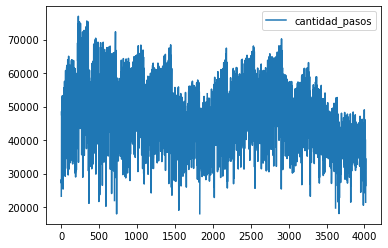

In [146]:
##Importamos el arhivo generado en la notebook de ETL
archivo=pd.read_csv('Diariofinal.csv')
archivo.plot()

### Mejorar la predicción anterior 
Para este punto el primer paso consistira en volver a realizar una predicción utilizando prophet, pero relizando una mejor utilizacion de la libreria ya que en el desarrollo del entregable anterior no contaba con experiencia de uso por lo que considero que no la aproveche al maximo y que la predección obtenida podría mejorar considerablemente

Para el entrenamiento de los modelos vamos a tomar como datasets de pruba la cantidad de trafico vehicular hasta 01/10/2019 y vamos a realizar el test de la predccion con los datos hasta el 31/12/2019

In [147]:
archivo
diario=archivo.copy()
diario.index=pd.to_datetime(archivo.fecha)
diario.drop(['fecha','Unnamed: 0'], axis='columns',inplace=True)
diario

,cantidad_pasos
fecha,
2009-01-01,23250.0
2009-01-02,28239.0
2009-01-03,27148.0
2009-01-04,29781.0
2009-01-05,48577.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


In [148]:
## Verificamos inicio y fin de la serie temporal
print(diario.index.min())
print(diario.index.max())
diario

2009-01-01 00:00:00
2019-12-31 00:00:00


,cantidad_pasos
fecha,
2009-01-01,23250.0
2009-01-02,28239.0
2009-01-03,27148.0
2009-01-04,29781.0
2009-01-05,48577.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


In [201]:
diario.interpolate(method='time',inplace=True)


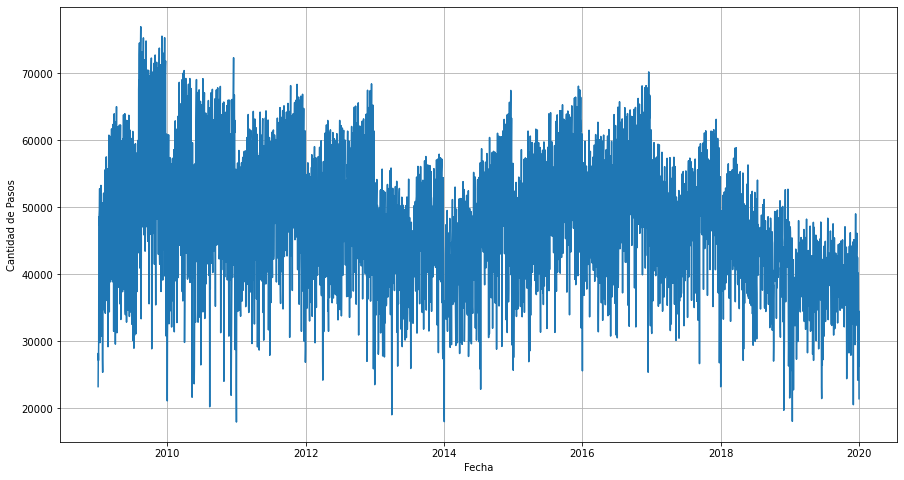

In [199]:
##Graficamos para coroborar la distribución de los datos 
plt.figure(figsize=(15,8))
plt.plot(diario)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.grid()
plt.show()

### Definimos los datasets de entrenamiento y test 
Como utilizaremos el metodo de cross validation de la libreria prophet no se dividirá en train y en test, dado a que esta funcion está implicita en la funcion de valización cruzada mencionada anteriormente.

In [150]:
train = diario

In [151]:
#Copiamos los df de train y test para la ejecucion de este modelo

train_prophet= train.copy()
train_prophet.reset_index(inplace=True)

## Seteo la estructura de input para prophet ya que la libreria trabaja con este formato
## Ds para la fecha e y para las cantidades
train_prophet.columns = ['ds','y']
train_prophet['ds'] = pd.to_datetime(train_prophet['ds'])

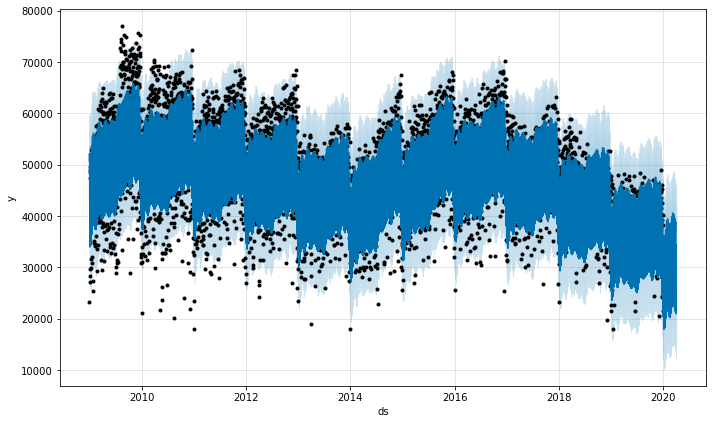

In [152]:
## Creamos el modelo
prp = Prophet(daily_seasonality=True)

#Fiteamos el modelo
prp.fit(train_prophet)

#Predecimos los 91 dias entre las fechas seleccionadas como train y test 
future = prp.make_future_dataframe(91, freq='D')
forecast = prp.predict(future)

#Graficamos
fig = prp.plot(forecast)

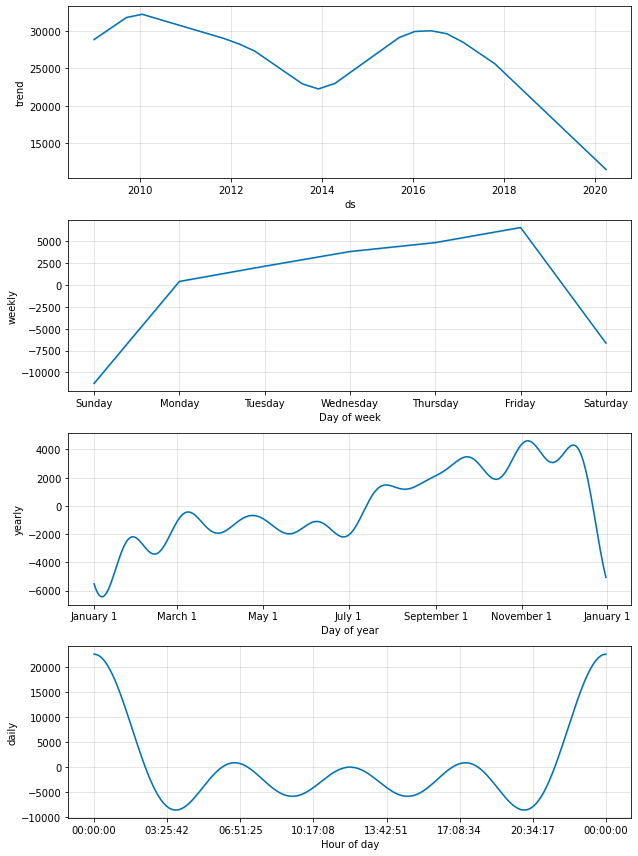

In [153]:
fig2=prp.plot_components(forecast)

Vamos a utilizar el procedimiento de validacion cruzada de prophet para evaluar su comportamiento respecto de las predicciones obtenidas 

In [154]:
from prophet.diagnostics import cross_validation
##Para esta validacion utilizamos como parametro inicial los primeros 5 años de la serie 
## y luego el modelo va a ahcer predicciones cada 180 dias lo que implica 12 pronosticos 
df_cv = cross_validation(prp, initial='600 days', period='180 days', horizon = '90 days' ,  parallel="processes")
##1825


INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E704843280>


In [155]:

from prophet.diagnostics import performance_metrics
df_perf = performance_metrics(df_cv)
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,3.386635e+07,5819.480550,4226.665676,0.096296,0.060382,0.093623,0.900619
1,10 days,3.173378e+07,5633.274340,4008.304175,0.090996,0.056281,0.088517,0.913003
2,11 days,2.886645e+07,5372.750630,3823.358407,0.087057,0.052623,0.084204,0.935913
3,12 days,2.841420e+07,5330.497075,3837.107675,0.087282,0.055895,0.084323,0.941486
4,13 days,2.812107e+07,5302.930750,3710.518782,0.085592,0.052698,0.081658,0.941486


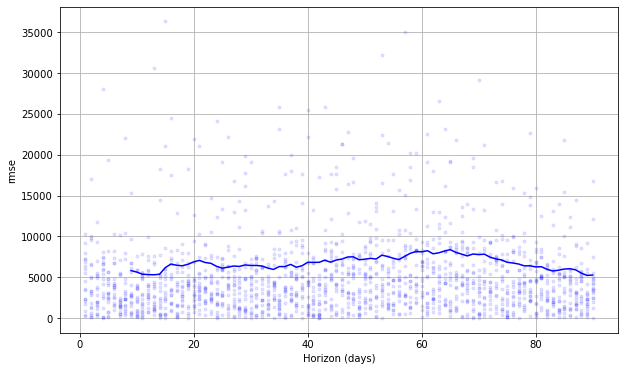

In [156]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [157]:
##RMSE promedio para todos los forecast construidos
df_perf.rmse.mean()

6760.129755059138

Podemos observar que tenemos en promedio un rmse de 6726 pases, lo cual vamos a tratar de mejorar con diferentes acciones.

Imputacion de los días feriados: COnsidero que los días feriados pueden ser un factor clave en la cantidad de trafico en las cabinas de peaje, ya que estos días se intensifica el pasos de los vehículos por la movida turistica que pueden producir dichas fechas, por lo que se utilizarán las fechas de feriados de argentina para los periodos en los que estamos trabajando y se incorporarán al modelo como regresor "holiday"

In [158]:
Feriados = []
for i in range(2012,2022,1):
    Feriados.append(i)

years = []
for i in range(2012,2022,1):
    years.append(i)

In [159]:
import holidays
Feriados = holidays.Argentina(years=years)
Feriados = pd.DataFrame.from_dict(Feriados,orient='index').reset_index().rename(columns={'index':'ds',0:'holiday'})
Feriados.head()

,ds,holiday
0,2016-01-01,Año Nuevo [New Year's Day]
1,2016-02-08,Día de Carnaval [Carnival's Day]
2,2016-02-09,Día de Carnaval [Carnival's Day]
3,2016-03-24,Semana Santa (Jueves Santo) [Holy day (Holy T...
4,2016-03-25,Semana Santa (Viernes Santo) [Holy day (Holy ...


Ahora vamos a crear otro modelo de Prophet en donde vamos a incorporar la información de los feriados de argentina para las fechas estudiadas 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


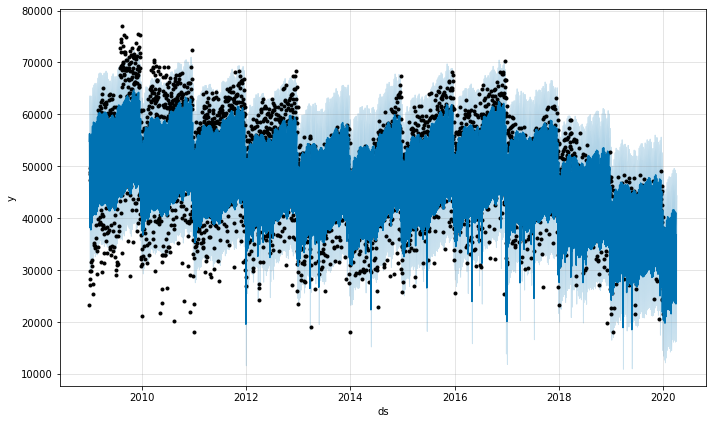

In [160]:
##Creamos el modelo nuevo con los feriados como Holidays
prpf = Prophet(weekly_seasonality=True,seasonality_prior_scale = 0.01,changepoint_prior_scale=0.01,holidays=Feriados)

##Entrenamos nuevamente
prpf.fit(train_prophet)

#Predecimos
future = prpf.make_future_dataframe(91, freq='D')
forecast = prpf.predict(future)

#Graficamos
fig = prpf.plot(forecast)

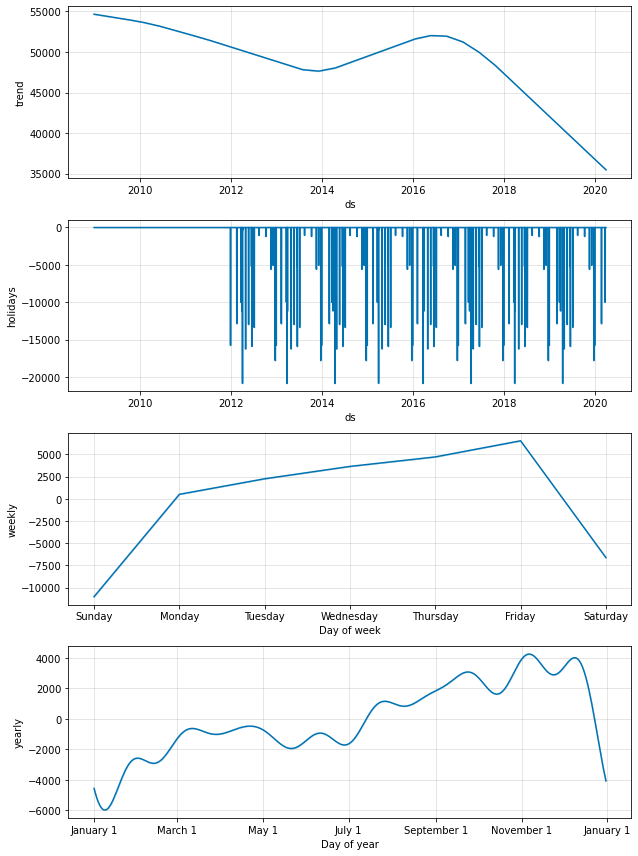

In [161]:
fig2=prpf.plot_components(forecast)

Esta vez podemos identificar dentro de los componentes de la serie temporal los feriados (gráfico 2 ). Ahora vamos a verificar si la incorporación de los mismos mejoró o no la predicción

In [162]:
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation
##Repetimos los pasos de aplicar validación cruzada, y evaluar el rmse para toda la serie

## En esta oportunidad utilizamos un initial de 1460 dias (4 años) y un horizonte de 180 dias, por lo que se 
## generaran 7 pronosticos para la validacion cruzada
prpf_cv = cross_validation(prpf, initial='600 days', period='180 days', horizon = '90 days' ,  parallel="processes")
prpfm = performance_metrics(prpf_cv)
prpfm.head()

INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E70BC55100>


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,3.304464e+07,5748.447154,4324.680218,0.097339,0.070695,0.092606,0.860062
1,10 days,3.190308e+07,5648.281297,4216.938291,0.094357,0.066364,0.089836,0.877709
2,11 days,3.116428e+07,5582.497958,4120.716500,0.092589,0.064776,0.088711,0.888545
3,12 days,3.082181e+07,5551.739598,4079.330502,0.091326,0.064776,0.087504,0.878019
4,13 days,2.996112e+07,5473.675130,3932.870103,0.089035,0.061290,0.084664,0.894118


In [163]:
prpfm.rmse.mean()

6671.054292568765

Podemos ver como la incorporación de los feriados fue efectiva ya que disminuyó el rmse promedio en un 12% aproxiamadamente (Pasó de 35mil a 32 mil )

Ahora vamos a proceder con otro punto no desarrollado en el trabajo práctico número 3 fue la optimización de hiperparametros de prophet, lo cual considero un punto importante a desarrollar en el proceso actual. 

In [164]:
## Para hacer la optimización vamos a utilizar el ejemplo que se propone en la pagina de la libreria mediante
## grid search
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.001, 0.1, 0.5]
}
 
# Generate all combinations
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params,holidays=Feriados).fit(train_prophet)  # Fit model with given params
    df_cv = cross_validation(m, initial='600 days', period='180 days', horizon = '90 days' ,  parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E701F60610>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E704758B80>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E70E5C6D90>
INFO:prophet:Disabling daily seasonality. Run prophet w

INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E70BCD3D60>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E70B74F970>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E70B6AD790>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 19 forecasts with cutoffs between 2

In [165]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                 0.001   
1                     0.001                     0.01                 0.100   
2                     0.001                     0.01                 0.500   
3                     0.001                     0.10                 0.001   
4                     0.001                     0.10                 0.100   
5                     0.001                     0.10                 0.500   
6                     0.001                     1.00                 0.001   
7                     0.001                     1.00                 0.100   
8                     0.001                     1.00                 0.500   
9                     0.001                    10.00                 0.001   
10                    0.001                    10.00                 0.100   
11                    0.001                    10.00            

In [166]:
##Identificamos los mejores hiperparámetros 
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1}


{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1}

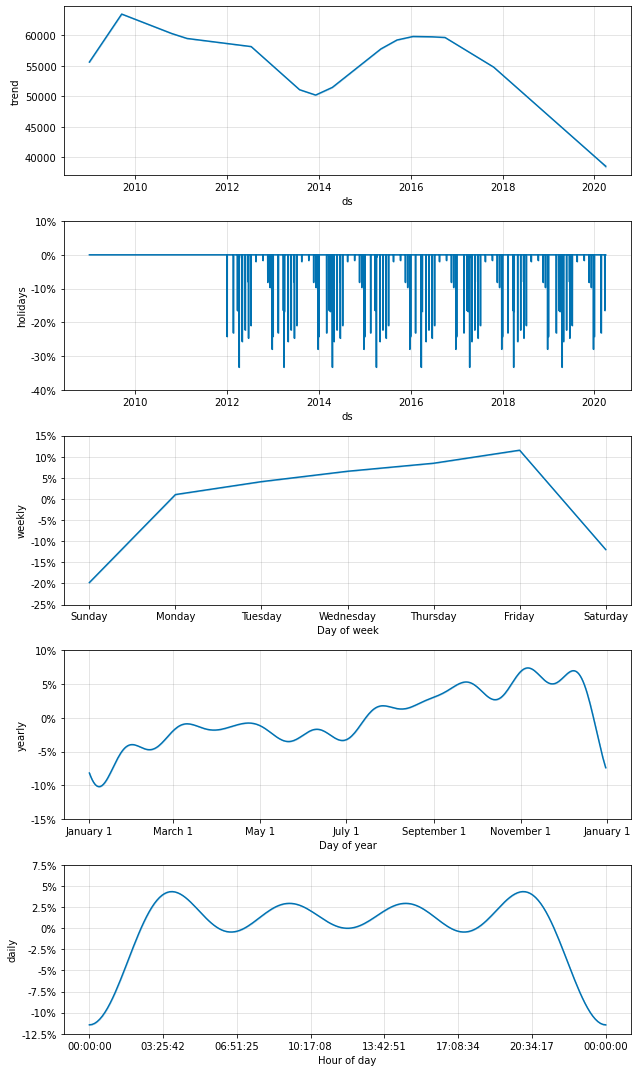

In [167]:
## Ejecutamos el modelo para los mejores hiperparametros 


##Mejores Hiperparametros 
## {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1}

prp_bp = Prophet(daily_seasonality=True,weekly_seasonality=True,
               seasonality_prior_scale = 0.01,
               changepoint_prior_scale=0.1,
               holidays_prior_scale=0.1,
               seasonality_mode='multiplicative' ,
               holidays=Feriados)
##Entrenamos el modelo
prp_bp.fit(train_prophet)

#Predecimos
future = prp_bp.make_future_dataframe(91, freq='D')
forecast = prp_bp.predict(future)

#Graficamos
fig2=prp_bp.plot_components(forecast)

In [168]:
from prophet.diagnostics import cross_validation
##Para esta validacion utilizamos como parametro inicial los primeros 5 años de la serie 
## y luego el modelo va a ahcer predicciones cada 180 dias lo que implica 12 pronosticos 
df_cv_bp = cross_validation(prp_bp, initial='600 days', period='180 days', horizon = '90 days' ,parallel="processes")

INFO:prophet:Making 19 forecasts with cutoffs between 2010-11-18 00:00:00 and 2019-10-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000001E70E5F8460>


In [169]:
from prophet.diagnostics import performance_metrics
metrics_prp_bp = performance_metrics(df_cv_bp)
metrics_prp_bp.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,2.856247e+07,5344.386714,3891.756190,0.086867,0.055442,0.083989,0.906502
1,10 days,2.710897e+07,5206.627444,3721.245932,0.082821,0.052787,0.080021,0.913003
2,11 days,2.533621e+07,5033.508694,3580.771490,0.080168,0.051043,0.077667,0.930031
3,12 days,2.417111e+07,4916.412285,3514.688217,0.078537,0.050895,0.076001,0.935604
4,13 days,2.408450e+07,4907.596457,3366.069075,0.076193,0.046430,0.072895,0.935604


In [377]:
df_cv_bp

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-11-19,60688.542883,51725.318286,70150.925994,66016.0,2010-11-18
1,2010-11-20,47775.053673,38417.911694,57140.118150,45152.0,2010-11-18
2,2010-11-21,44427.995838,34854.151427,53137.915014,36647.0,2010-11-18
3,2010-11-22,57262.443942,47271.628633,65556.292430,30790.0,2010-11-18
4,2010-11-23,59083.131738,49470.413621,67766.097508,59225.0,2010-11-18
...,...,...,...,...,...,...
1695,2019-12-27,39126.820074,31953.018853,46179.544046,40182.0,2019-10-02
1696,2019-12-28,29141.933580,22405.044228,36201.993736,30681.0,2019-10-02
1697,2019-12-29,25630.536091,18831.962436,33082.185337,26259.0,2019-10-02
1698,2019-12-30,33828.264427,26381.302448,40537.652450,34523.0,2019-10-02


In [381]:
from sklearn.metrics import mean_squared_error 
rmse_Prophet = np.sqrt(mean_squared_error(df_cv_bp['y'], df_cv_bp['yhat']))
print('RMSE Prophet:',rmse_Prophet)

RMSE Prophet: 6011.734254900504


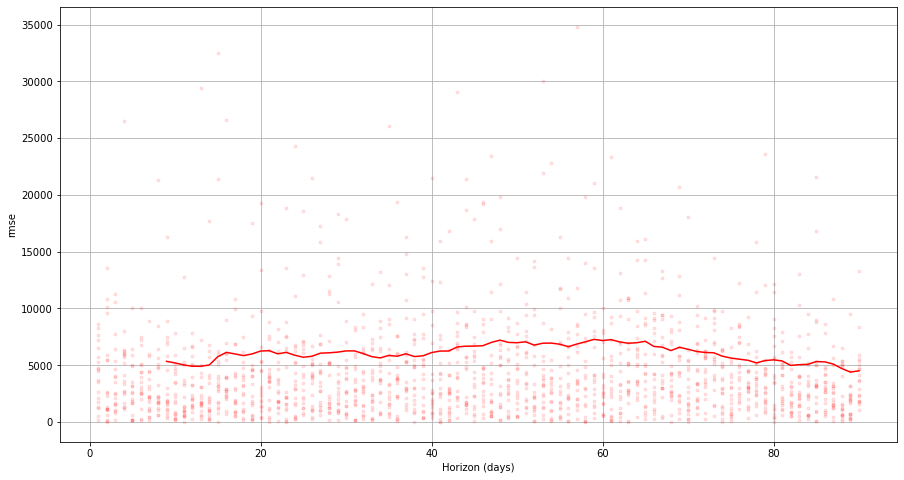

In [171]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_bp, metric='rmse', figsize=(15,8),color='r')

In [172]:
columns=['ds','yhat_lower','yhat_upper','yhat']
forecast_fil=forecast[columns]

In [173]:
df_complete=train_prophet.merge(forecast_fil,how='right',left_on='ds',right_on='ds')
df_complete.index=pd.to_datetime(df_complete['ds'])
df_complete.drop(columns='ds',inplace=True)
df_complete.tail()

,y,yhat_lower,yhat_upper,yhat
ds,,,,
2020-03-27,NaN,31256.778791,45298.136498,37984.857505
2020-03-28,NaN,22263.891818,36061.509639,28875.859911
2020-03-29,NaN,18494.098743,32804.499230,25840.220734
2020-03-30,NaN,26618.819823,41135.071169,33866.671713
2020-03-31,NaN,27713.016118,42178.838878,35034.131278


In [330]:
df_complete.drop(['yhat_lower','yhat_upper'],axis='columns',inplace=True)

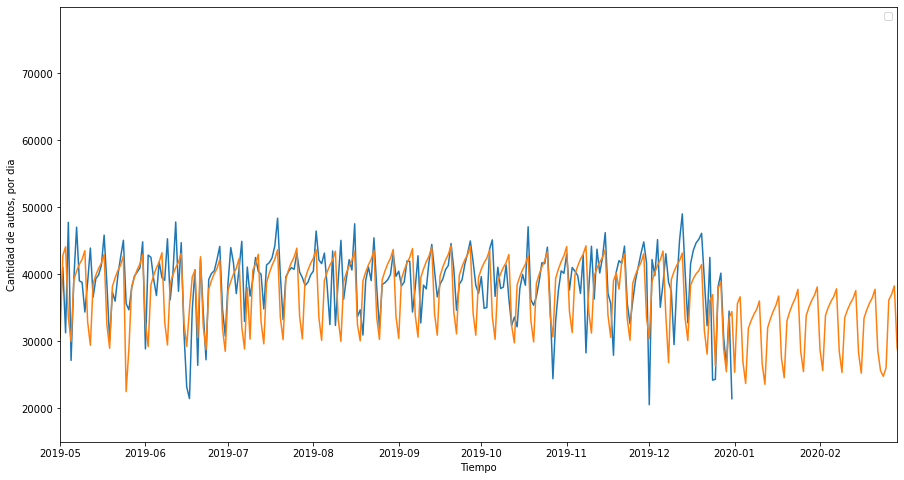

In [331]:
import datetime
plt.figure(figsize=(15,8))
plt.plot(df_complete)
plt.xlabel('Tiempo')
plt.legend()
plt.xlim(datetime.date(2019, 5, 1), datetime.date(2020, 2, 29))
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Luego de haber hecho un uso correcto de la libreria prophet vamos a desarrollar el punto **Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera**, para lo cual vamos a utilizar como desafio el uso de redes neuronales para predecir el tráfico. En este punto tambien se abordará el punto **Sigue las sugerencias que te propusimos** ya que en la devolución anterior, se me sugirió el uso de keras o tensorflow para las predicciones bajo incertidumbre, punto que se abordará mediante el uso de Keras

### Marco Teórico
Para resolver el problema de predecir la cantidad de pasos de vehículos en las cabinas de peaje de buenos aires con redes reuronales voy a utilizar las redes neuronales LSTM (Long Short Term Memory). La principal caractristica de estas redes es que la información puede persistir introduciendo bucles en el diagrama de la red, lo que basicamente se puede traducir en que esta red es capaz de recordar estados previos de los datos y utilizar estos estados para predecir cual será el siguiente valor, lo que la hace una de las más adecuadas para manejar series temporales.

Fuente: https://gredos.usal.es/bitstream/handle/10366/148573/ACTAS_20_21.pdf?sequence=1#page=142

### Idea de funcionamiento

La idea principal detrás de las redes LSTM es el estado de la celda. Se podría decir que el estado de la celda es la memoria de la LSTM, y en función de esta memoria la red hará distintas predicciones. Esta memoria sólo sufrirá ligeras modificaciones lineales a lo largo de todo el proceso de transmisión de la información dentro de la LSTM.
La red LSTM es capaz de añadir o quitar información del estado de la celda mediante unas estructuras denominadas puertas. 
La red LSTM cuenta con 4 puertas diferentes, la puerta de entrada, la puerta de salida, la puerta de estado y la puerta de olvido.
* **Puerta de olvido:** El proceso de transmisión de la información dentro de la neurona LSTM comienza con la puerta de olvido. Esta se encarga de modificar el estado de la celda de memoria, y es la que decide si se mantiene o se borra la memoria de la red. Si la puerta genera un 1, la memoria se mantiene, pero si genera un 0, la información se borra.
* **Puerta de entrada:** Una vez se ha borrado o no la memoria, llega el mo- mento de decidir si se va a almacenar nueva información o se va modificar la existente. Esta decisión la tomara la puerta de entrada. Si la puerta genera un 1, la información se actualiza, pero si genera un 0, la información no se actualiza.
* **Puerta de estado:** Una vez se ha decidido si la información se actualiza, se decide que elementos son candidatos para ser modificados. Este decisión la lleva a cabo la puerta de estado. Esta puerta decide que elementos son candidatos a ser actualizados.
* **Celda de memoria:** Una vez se ha decidido si borrar o no la memoria, si ac- tualizar o no la información, y en el caso que se decida actualizar, que elementos actualizar, se modifica la celda de memoria. Este proceso de actualización de la celda lo lleva a cabo el estado de la celda de memoria.
* **Puerta de salida:** Una vez se ha actualizado la celda de memoria, se genera una señal de salida. La puerta encargada de este proceso se denomina puerta de salida. Esta se encarga de crear una señal que definirá la salida del sistema.

### Implementación

Primero antes de implementar la red neuronal, vamos a graficar los componentes de la serie para tener una mejor vision de la misma, para lo cual vamos a utilizar solo los ultimos 5 años 

In [220]:
from statsmodels.tsa.seasonal import seasonal_decompose   

In [260]:
last_5_y=diario[diario.index > "2016-01-01"]

In [261]:
result=seasonal_decompose(last_5_y['cantidad_pasos'], model='multiplicative', period=10)

### Tendencia

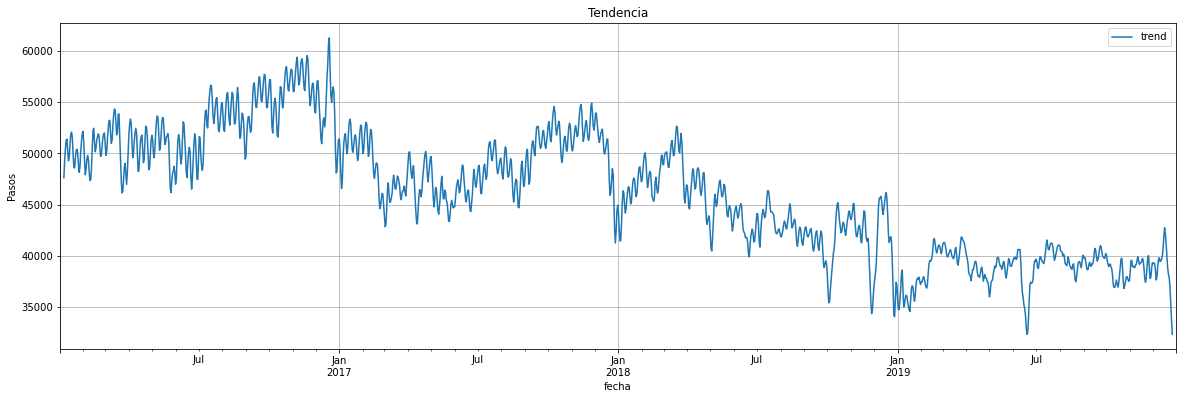

In [274]:
result.trend.plot(figsize=(20,6))
plt.title('Tendencia')
plt.ylabel('Pasos')
plt.legend()
plt.grid()
plt.show()

### Estacionalidad

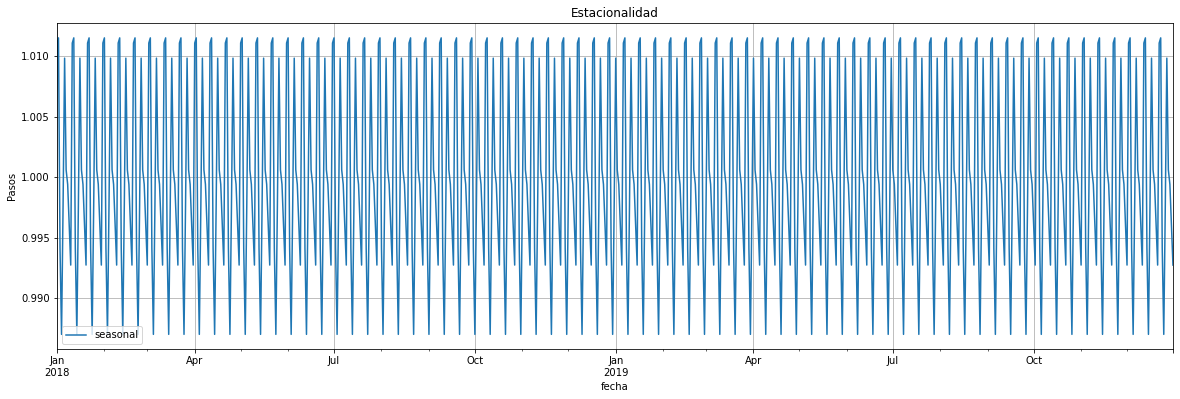

In [280]:
result.seasonal.plot(figsize=(20,6))
plt.title('Estacionalidad')
plt.ylabel('Pasos')
plt.legend()
plt.xlim(datetime.date(2018, 1, 1))
plt.grid()
plt.show()

### Ruido

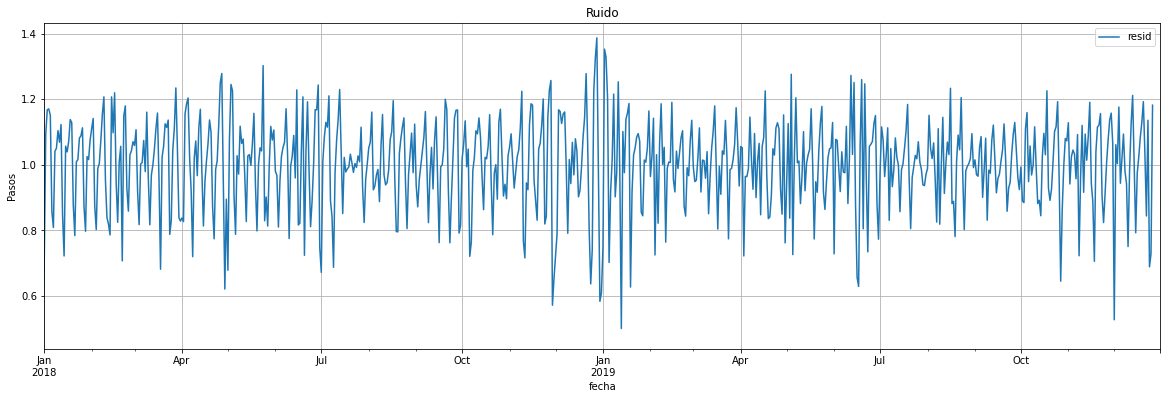

In [281]:
result.resid.plot(figsize=(20,6))
plt.title('Ruido')
plt.ylabel('Pasos')
plt.legend()
plt.xlim(datetime.date(2018, 1, 1))
plt.grid()
plt.show()

In [282]:
## División de train y Test 
train = diario[diario.index < "2019-10-01"]
test = diario[diario.index >= "2019-10-01"]

In [283]:
## Scalado de datos
##Para que la red tenga una mejor interpretacion de los datos, vamos a escalarlos
scl = MinMaxScaler()
##Entrenamos el scaler
scl.fit(train)
##Transformamos
scl_train=scl.transform(train)
scl_test=scl.transform(test)

Para poder realizar las predicciones, vamos a utilizar un generador de series temporales de keras, lo que nos va a permitir generar espacios de tiempo homogeneos (periodos de tiempo de igual tamaño) Documentación: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator

In [308]:
from keras.preprocessing.sequence import TimeseriesGenerator
# Definimos el generator
##lengh : in number of timesteps
n_input = 28
##Number of timeseries samples 
batch = 1
generator = TimeseriesGenerator(scl_train, scl_train, length=n_input, batch_size=1)

In [309]:
X,y = generator[0]

In [310]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import regularizers

In [311]:
#Creación del modelo secuencial
model = Sequential()
## agregamos un layer. ## cantidad de neuronas del modelo 
model.add(LSTM(100, activation='relu', input_shape=(n_input, 1))) 
## el output tiene  una sola neoura de acuerdo al shape de salida 
model.add(Dense(1)) 
model.compile(loss = "mse",optimizer = "adam") ## Usamos el mse para poder comparar con el modelo de prophet

In [312]:
## Verificamos los parametros del modelo creado
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [313]:
model.fit_generator(generator,epochs=25)

Epoch 1/25


<ipython-input-313-9fb5b5d15aca>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=25)


3897/3897 [==============================] - 25s 6ms/step - loss: 0.0214
Epoch 2/25
3897/3897 [==============================] - 25s 6ms/step - loss: 0.0140
Epoch 3/25
3897/3897 [==============================] - 27s 7ms/step - loss: 0.0128
Epoch 4/25
3897/3897 [==============================] - 26s 7ms/step - loss: 0.0122
Epoch 5/25
3897/3897 [==============================] - 26s 7ms/step - loss: 0.0120
Epoch 6/25
3897/3897 [==============================] - 26s 7ms/step - loss: 0.0117
Epoch 7/25
3897/3897 [==============================] - 25s 6ms/step - loss: 0.0115
Epoch 8/25
3897/3897 [==============================] - 25s 6ms/step - loss: 0.0112
Epoch 9/25
3897/3897 [==============================] - 24s 6ms/step - loss: 0.0109
Epoch 10/25
3897/3897 [==============================] - 25s 6ms/step - loss: 0.0108
Epoch 11/25
3897/3897 [==============================] - 24s 6ms/step - loss: 0.0106
Epoch 12/25
3897/3897 [==============================] - 25s 6ms/step - loss: 0.0106


In [306]:
model.history.history.keys()

dict_keys([])

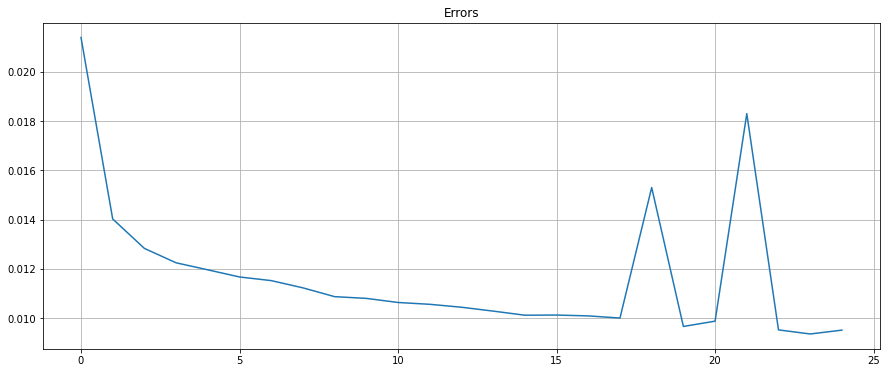

In [314]:
#Graficamos la curva del error,a medida que aumentan las epochs
plt.figure(figsize=(15,6))
plt.title("Errors")
loss_per_epoch = model.history.history['loss']
plt.grid()
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.show()

### Predicción

In [320]:
test_predictions = []

first_eval_batch = scl_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, 1))

for i in range(len(test)):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [321]:
##Verificamos las predicciones obtenidas
test_predictions

[array([0.34962255], dtype=float32),
 array([0.39275467], dtype=float32),
 array([0.41731966], dtype=float32),
 array([0.43083984], dtype=float32),
 array([0.38261408], dtype=float32),
 array([0.3307534], dtype=float32),
 array([0.2947625], dtype=float32),
 array([0.3494123], dtype=float32),
 array([0.37851882], dtype=float32),
 array([0.40660554], dtype=float32),
 array([0.42630583], dtype=float32),
 array([0.37311548], dtype=float32),
 array([0.30452207], dtype=float32),
 array([0.29814088], dtype=float32),
 array([0.3485009], dtype=float32),
 array([0.37483627], dtype=float32),
 array([0.39962697], dtype=float32),
 array([0.42024255], dtype=float32),
 array([0.36647314], dtype=float32),
 array([0.29382297], dtype=float32),
 array([0.29823956], dtype=float32),
 array([0.34667456], dtype=float32),
 array([0.37748867], dtype=float32),
 array([0.4021081], dtype=float32),
 array([0.419873], dtype=float32),
 array([0.37098223], dtype=float32),
 array([0.29914987], dtype=float32),
 array([

<ipython-input-322-87aece528a2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions
C:\Users\lucre\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:xlabel='fecha'>

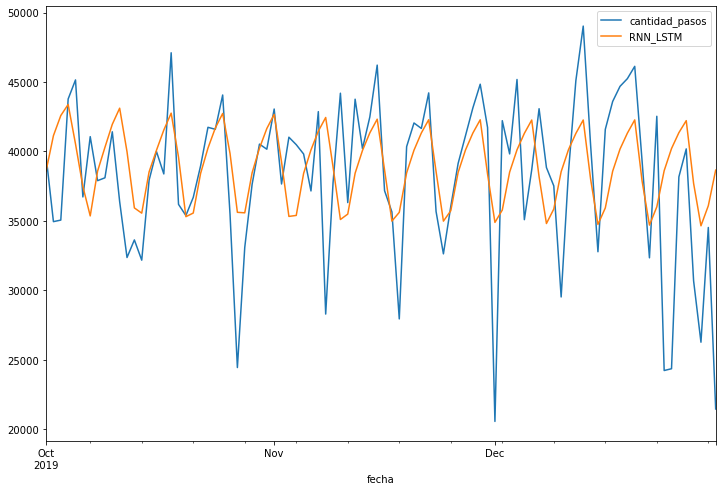

In [322]:
##Comparación entre la prediccion y el dataset de test
true_predictions = scl.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.rename(columns={'Predictions':'RNN_LSTM'},inplace = True)
test.plot(figsize=(12,8))

In [323]:
## Verificamos el rmse para la red 
from sklearn.metrics import mean_squared_error 
rmse_RNN_LSTM = np.sqrt(mean_squared_error(test.cantidad_pasos, test.RNN_LSTM ))
print('RMSE Red Neuronal LSTM :',rmse_RNN_LSTM)

RMSE Red Neuronal LSTM : 5276.745706786923


In [339]:
##Unifico el data set con las predicciones de Prophet y las de LSTM
df_merge=test.merge(df_complete,how='left',left_on=test.index,right_on=df_complete.index)
df_merge.index=pd.to_datetime(df_merge['key_0'])
df_merge.drop(['key_0','y'],axis='columns',inplace=True)

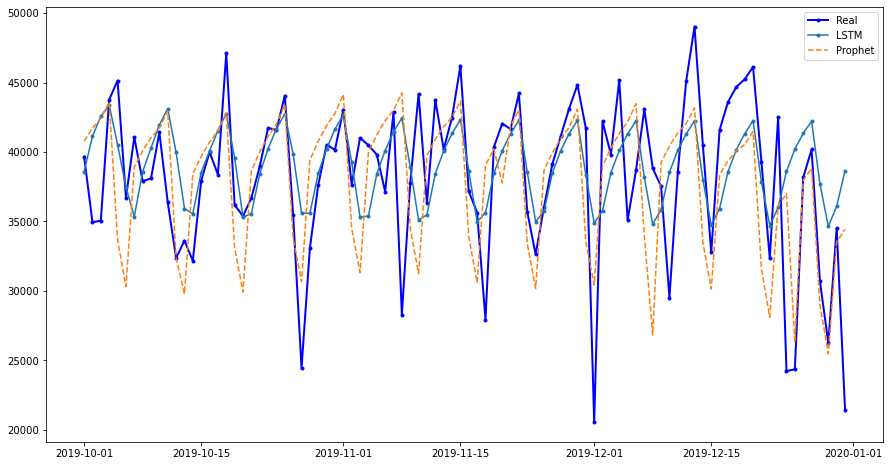

In [373]:
##Graficamos la comparación
plt.figure(figsize=(15,8))
plt.plot(df_merge.cantidad_pasos,linewidth=2 ,c='blue',  marker='.')
plt.plot(df_merge.RNN_LSTM , marker='.')
plt.plot(df_merge.yhat,linestyle='dashed')
plt.legend(['Real','LSTM','Prophet'])
plt.show()

In [382]:
print('RMSE Red Neuronal LSTM : 5276.745706786923')
print ('RMSE Prophet: 6011.734254900504')

RMSE Red Neuronal LSTM : 5276.745706786923
RMSE Prophet: 6011.734254900504


### Comparación
Como podemos observar se logro el objetivo de poder mejorar la predicción del entregable anterior, en las dos estapas del proyecto actual, tanto en la mejora de la utilziación de la libreria, en donde se incorporó un mejor manejo de lo que es validación cruzada y la optimización de hiperparametros, así como también otra mejora considerable al utilizar redes recurrentes para la predicción.
La exploración del campo de las redes neuronales me resultó muy interesante y es algo que tengo pensado profundizar más aún, pero destaco a este trabajo como el puntapie incial de un gran camino de investigación. 
También quiero aclarar que utilice la metodología de separar la notebook que se encarga de todo el pre procesamiento de los datos, ya que he visto que es una buena práctica en el mundo laboral, ya que define limites entre las porciones de código. 